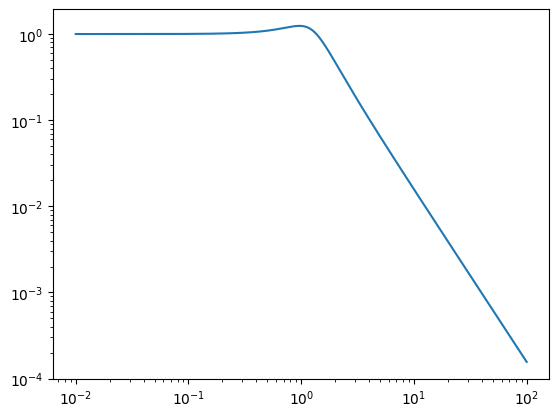

In [6]:
import control
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import seisim.system

s = control.tf("s")
wn = 7.85398163397
q = 1.11111111
tf = wn**2 / (s**2 + wn/q*s + wn**2)

f = np.logspace(-2, 2, 1024)

plt.loglog(f, abs(tf(1j*2*np.pi*f)))

data = np.loadtxt("notebook/data/itmx_z_1441947618.txt")
data_dt = 1/512  # Data sampling rate
dt = 1/64  # Downsampled rate
q = int(dt/data_dt)  # Downsampling factor

u = scipy.signal.decimate(data, q)
u = u-np.mean(u)

t = np.arange(0, dt*len(u), dt)
_, y_out = control.forced_response(tf, T=t, U=u)

ham = seisim.system.System(tf, dt)

y_sim = np.zeros_like(t)

for i in range(len(t)):
    y_sim[i] = ham.step(u[i])

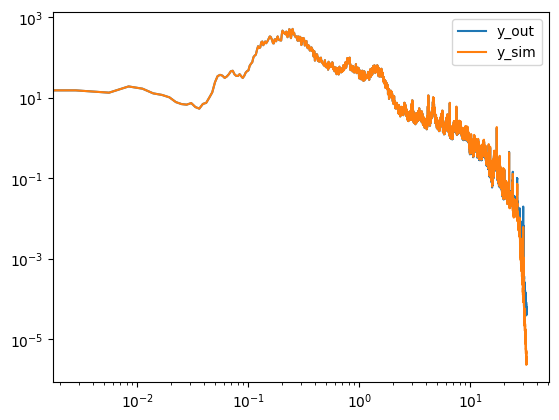

In [12]:
f_, p_dd = scipy.signal.welch(data, fs=1/data_dt, nperseg=int(len(data)/10))
f, p_xx = scipy.signal.welch(u, fs=1/dt, nperseg=int(len(u)/10))
f, p_yy = scipy.signal.welch(y_out, fs=1/dt, nperseg=int(len(y_out)/10))
f, p_ss = scipy.signal.welch(y_sim, fs=1/dt, nperseg=int(len(y_sim)/10))
a_dd = p_dd**.5
a_xx = p_xx**.5
a_yy = p_yy**.5
a_ss = p_ss**.5

# plt.loglog(f_, a_dd)
# plt.loglog(f, a_xx)
plt.loglog(f, a_yy, label="y_out")
plt.loglog(f, a_ss, label="y_sim")
plt.legend(loc=0)

In [ ]:
predictor = GMP(model=path)

predictor.step(ground[0:10]) -> ground_pred : array[0:1]

In [10]:
ham.step(u[2])

array([[154.53601573]])